t: [0.   0.   0.   0.   0.   2.55 6.5  6.5  6.5  6.5  6.5 ]
c: [-5.62048630e-18  2.98780300e+00 -5.74472095e-01  1.46700914e+01
 -1.03253068e+01  3.10000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
k: 4



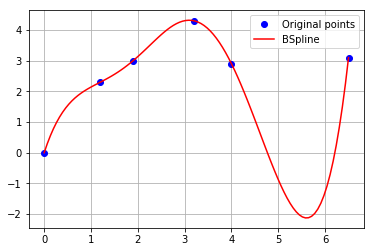

In [6]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

x = np.array([ 0. ,  1.2,  1.9,  3.2,  4. ,  6.5])
y = np.array([ 0. ,  2.3,  3. ,  4.3,  2.9,  3.1])

t, c, k = interpolate.splrep(x, y, s=0, k=4)
print('''\
t: {}
c: {}
k: {}
'''.format(t, c, k))

N = 100
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)

spline = interpolate.BSpline(t, c, k, extrapolate=False)

plt.plot(x, y, 'bo', label='Original points')
plt.plot(xx, spline(xx), 'r', label='BSpline')

plt.grid()
plt.legend(loc='best')
plt.show()

num: 13 k: 3
t: [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


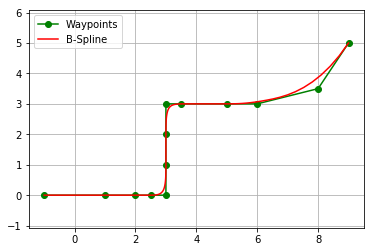

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import BSpline

def main():
   k = 3     # degree, k越大，曲线越逼近原始控制点
   t = []    # knots vector
   c1 = [-1.0, 1.0, 2.0, 2.5, 3.0, 3.0, 3.0, 3.0, 3.5, 5.0, 6.0, 8.0, 9.0] #x轴的路点
   c2 = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0,  3.5, 5.0] #y轴的路点

   num = len(c1)
   print "num:", num, "k:", k
   
   for i in range(num+k+1):
       if i <= k:
          t.append(0)
       elif i >= num:
          t.append(num-k)
       else:
          t.append(i-k)
   print "t:", t
   
   xx = np.linspace(0.0, num-k, 100)

   spl_x = BSpline(t, c1, k)
   spl_y = BSpline(t, c2, k)

   plt.plot(c1, c2, '-og', label="Waypoints")
   plt.plot(spl_x(xx), spl_y(xx), '-r', label="B-Spline")

   plt.grid(True)
   plt.legend()
   plt.axis("equal")
   plt.show()
   
   
if __name__ == '__main__':
   main()